## Plotting time-series
Time series data is data that is recorded. Visualizing this type of data helps clarify trends and illuminates relationships between data.

pandas DataFrame objects can have an index that denotes time. This is useful because Matplotlib recognizes that these measurements represent time and labels the values on the axis accordingly.

In this exercise, you will read data from a CSV file called `climate_change.csv` that contains measurements of CO2 levels and temperatures made on the 6th of every month from 1958 until 2016. You will use pandas' `read_csv` function.

To designate the index as a DateTimeIndex, you will use the `parse_dates` and `index_col` key-word arguments both to parse this column as a variable that contains dates and also to designate it as the index for this DataFrame.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Import pandas
import pandas as pd

# Read the data from file using read_csv
climate_change = pd.read_csv('/Users/tarcisio/Documents/datacamp/visualization/climate_change.csv', parse_dates=["date"], index_col="date")

In [5]:
# view the data
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


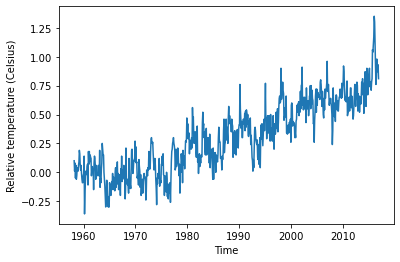

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change["relative_temp"])

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel("Relative temperature (Celsius)")

# Show the figure
plt.show()

## Using a time index to zoom in

When a time-series is represented with a time index, we can use this index for the x-axis when plotting. We can also select a range of dates to zoom in on a particular period within the time-series using pandas' indexing facilities. In this exercise, you will select a portion of a time-series dataset and you will plot that period.



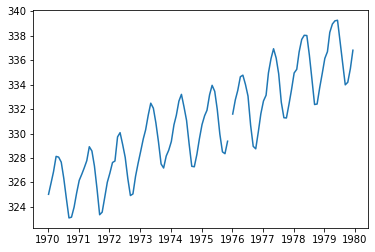

In [7]:
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

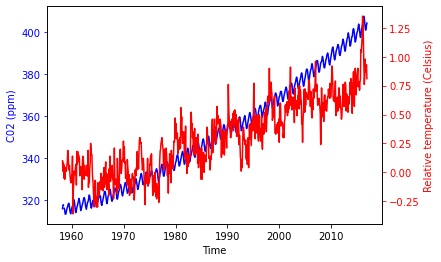

In [11]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color="bLue")
ax.set_xlabel('Time')
ax.set_ylabel('C02 (ppm)', color='blue')
ax.tick_params('y', colors = 'blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx() # aqui deixa o mesmo x label para ambos os gráficos

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color="red")
ax2.set_ylabel('Relative temperature (Celsius)', color='red')
ax2.tick_params('y', colors = 'red')

plt.show()


In [9]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y',colors=color)


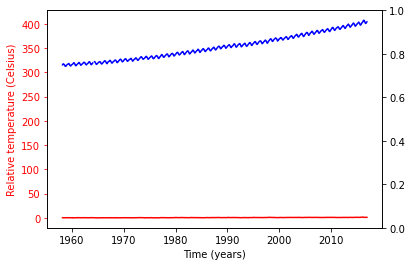

In [10]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')
# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temperature (Celsius)')

plt.show()

## Annotating a plot of time-series data
Annotating a plot allows us to highlight interesting information in the plot. For example, in describing the climate change dataset, we might want to point to the date at which the relative temperature first exceeded 1 degree Celsius.

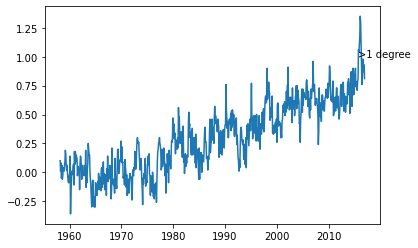

In [12]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', xy=[pd.Timestamp('2015-10-06'), 1])


plt.show()

## Plotting time-series: putting it all together
In this exercise, you will plot two time-series with different scales on the same Axes, and annotate the data from one of these series.

The CO2/temperatures data is provided as a DataFrame called `climate_change`. You should also use the function that we have defined before, called `plot_timeseries`, which takes an Axes object (as the axes argument) plots a time-series (provided as x and y arguments), sets the labels for the x-axis and y-axis and sets the color for the data, and for the y tick/axis labels:

```
plot_timeseries(axes, x, y, color, xlabel, ylabel)
```

Then, you will annotate with text an important time-point in the data: on 2015-10-06, when the temperature first rose to above 1 degree over the average.

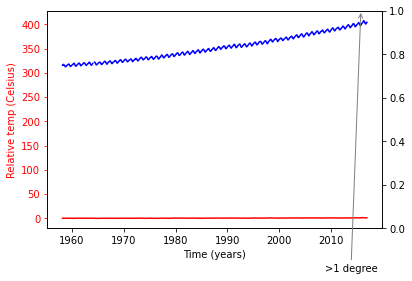

In [13]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", 
xy=(pd.Timestamp('2015-10-06'),1),
xytext=(pd.Timestamp('2008-10-06'), -0.2),
arrowprops = {"arrowstyle": "->", "color":"gray"})


plt.show()